## Método Secante

### Método cerrado

In [2]:
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Se define la función que se desea evaluar
def f(x):
  return m.e**(-x)-x

In [4]:
#Función del método secante
def secante(f,x0,x1,iteraciones,tol=1e-3):
  x=x1
  tabla=pd.DataFrame(columns=['x','x0','x1','f(x)','f(x0)','f(x1)','Error(%)'])
  for idx in range(iteraciones):
    #Formula del método secante
    x1 = x - (f(x)*(x0-x))/(f(x0)-f(x))
    #Se agrega cada valor a la tabla
    tabla=tabla._append({'x':x,'x0':x0,'x1':x1,'f(x)':f(x),'f(x0)':f(x0),'f(x1)':f(x1),'Error(%)':abs((x1-x)/x1*100)}, ignore_index=True)
    error = (x1-x0)/x1
    x0=x
    x=x1
    if np.abs(error)<tol:
       break
   
  return x,tabla

In [5]:
#Se obtiene la raíz y la tabla con cada iteración
raiz,tabla = secante(f,-1.5,1.5,20)

print("Raiz:", raiz)
print(tabla)

#Se crea lista con los puntos para evaluar la función y se envalua la función
x = np.linspace(-10,10)
y = f(x)

Raiz: 0.5671432904099507
          x        x0        x1          f(x)     f(x0)         f(x1)  \
0  1.500000 -1.500000  0.972263 -1.276870e+00  5.981689 -5.940370e-01   
1  0.972263  1.500000  0.513153 -5.940370e-01 -1.276870  8.545169e-02   
2  0.513153  0.972263  0.570890  8.545169e-02 -0.594037 -5.868310e-03   
3  0.570890  0.513153  0.567180 -5.868310e-03  0.085452 -5.780703e-05   
4  0.567180  0.570890  0.567143 -5.780703e-05 -0.005868  3.917290e-08   
5  0.567143  0.567180  0.567143  3.917290e-08 -0.000058 -2.614575e-13   

    Error(%)  
0  54.279231  
1  89.468342  
2  10.113518  
3   0.654156  
4   0.006508  
5   0.000004  


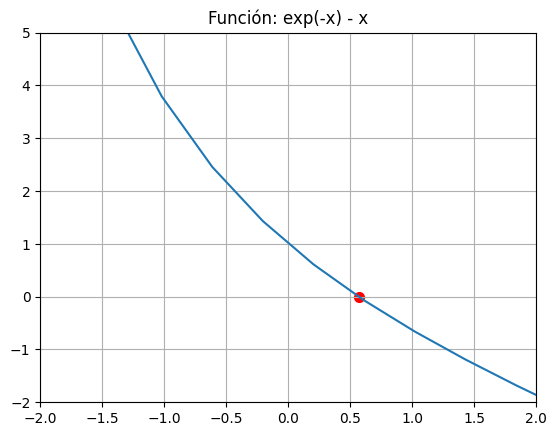

In [7]:
plt.plot(x,y)
plt.title('Función: exp(-x) - x')
plt.scatter(raiz,0, linewidths=2, color='red')
plt.xlim(-2,2)
plt.ylim(-2,5)
plt.grid()
plt.show()